In [ ]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import shutil
import random
from sklearn.metrics import confusion_matrix
import cv2

In [ ]:
train1 = np.load("canny_features_age_train.npy")
test1 = np.load("canny_features_age_test.npy")

In [ ]:
def class_labels(age):
    if 1 <= age <= 4:
        return 0
    elif 5 <= age <= 11:
        return 1
    elif 12 <= age <= 18:
        return 2
    elif 19 <= age <= 34:
        return 3
    elif 35 <= age <= 44:
        return 4
    elif 45 <= age <= 64:
        return 5
    else:
        return 6

In [ ]:
feature_names = pd.read_csv("canny_features_names.csv")
feature_names

,canny_edge_features
0,sec1_mean
1,sec1_std
2,sec2_mean
3,sec2_std
4,sec3_mean
...,...
796,sec399_mean
797,sec399_std
798,sec400_mean
799,sec400_std


In [ ]:
train_df1 = pd.DataFrame(train1, columns=feature_names["canny_edge_features"])
test_df1 = pd.DataFrame(test1, columns=feature_names["canny_edge_features"])


In [ ]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [ ]:
train_df1['age'] = train_df1['age'].astype(np.uint8)
test_df1['age'] = test_df1['age'].astype(np.uint8)

In [ ]:
train_df1['target'] = train_df1['age'].map(class_labels)
test_df1['target'] = test_df1['age'].map(class_labels)

In [ ]:
X_train2 = train_df1.drop(columns=['age', 'target'])
y_train2 = train_df1['target']

X_test2 = test_df1.drop(columns=['age', 'target'])
y_test2 = test_df1['target']

In [ ]:
# Scaling X_train to the standard scale.
ss = StandardScaler()
X_train_sc1 = ss.fit_transform(X_train2)

In [ ]:
X_test_sc1 = ss.transform(X_test2)

In [ ]:
# Creating a RandomForestClassifier object.

rfc = RandomForestClassifier(# class_weight='balanced_subsample', 
                             # n_estimators=200,
                             # max_depth=5,
                             ccp_alpha=0,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=42
                            )

In [ ]:
# Establishing ranges of hyperparameters of RandomForestClassifier for GridSearchCV.

rfc_params = {'n_estimators' : [50, 100, 200],
              'max_depth' : [5, 7, 9],
              # 'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10],
              # 'min_samples_split' : [2, 5, 10, 15, 20],
              # 'min_samples_leaf' : [2, 3, 4, 5, 6]
             }

In [ ]:
# Creating a GridSearchCV object for the RandomForestClassifier object defined above.

rfc_gs = GridSearchCV(rfc, param_grid=rfc_params, n_jobs=-1, cv=5)

In [ ]:
# Fitting X_train_sc and y_train on GridSearchCV object with RandomForestClassifier defined above.

rfc_gs.fit(X_train_sc1, y_train2)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Best combination of hyperparameters suggested by GridSearchCV.

rfc_gs.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [ ]:
# Best accuracy score obtained by the above combination of hyperparameters.

rfc_gs.best_score_

0.5013150419267063

In [ ]:
# Scoring the model on training dataset.
# Training Accuracy

rfc_train_acc = rfc_gs.score(X_train_sc1, y_train2)
rfc_train_acc

0.7780537697253068

In [ ]:
rfc_test_acc = rfc_gs.score(X_test_sc1, y_test2)
rfc_test_acc

0.501704158145876

In [ ]:
rfc_pred = rfc_gs.predict(X_test_sc1)

In [ ]:
conf_mat_rfc = confusion_matrix(y_test2, rfc_pred)
conf_mat_rfc

array([[544,   2,   0,  77,   0,  14,   2],
       [107,  34,  13, 118,   0,  31,   3],
       [ 28,   9,  17, 180,   0,  48,   5],
       [ 31,   2,   0, 498,   0,  85,   1],
       [ 13,   1,   0, 150,   0,  92,   1],
       [ 19,   1,   1, 174,   0, 261,  39],
       [ 12,   2,   1,  57,   0, 143, 118]])

In [ ]:
# Creating a SVC object.

svc = SVC(# class_weight='balanced',
          # C=1.0,
          # kernel='rbf',
          # degree=3,
          random_state=42
         )

In [ ]:
# Establishing ranges of hyperparameters of SVC for GridSearchCV.

svc_params = {'C' : [0.001, 1],
              'kernel' : ['rbf', 'poly', 'linear'],
              'degree' : [3, 5]
             }

In [ ]:
# Creating a GridSearchCV object for the SVC object defined above.

svc_gs = GridSearchCV(svc, param_grid=svc_params, n_jobs=-1, cv=5)

In [ ]:
# Fitting X_train_sc and y_train on GridSearchCV object with SVC defined above
svc_gs.fit(X_train_sc1, y_train2)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 1], 'degree': [3, 5],
                         'kernel': ['rbf', 'poly', 'linear']})

In [ ]:
# Best combination of hyperparameters suggested by GridSearchCV.
svc_gs.best_params_

{'C': 1, 'degree': 3, 'kernel': 'rbf'}

In [ ]:
# Best accuracy score obtained by the above combination of hyperparameters.

svc_gs.best_score_

0.5675044532441402

In [ ]:
# Scoring the model on training dataset.
# Training Accuracy

svc_train_acc = svc_gs.score(X_train_sc1, y_train2)
svc_train_acc

0.8522793687901812

In [ ]:
# Actual Testing Accuracy

svc_test_acc = svc_gs.score(X_test_sc1, y_test2)
svc_test_acc

0.5770279481935924

In [ ]:
svc_pred = svc_gs.predict(X_test_sc1)

In [ ]:
conf_mat_svc = confusion_matrix(y_test2, svc_pred)
conf_mat_svc

array([[551,  40,   6,  26,   0,  10,   6],
       [ 69, 112,  36,  72,   0,  12,   5],
       [ 11,  28,  82, 127,   2,  29,   8],
       [ 12,  18,  15, 463,  23,  81,   5],
       [  4,   3,   3, 109,  24, 111,   3],
       [  7,   5,  17, 107,  18, 296,  45],
       [  7,   4,   3,  17,   4, 133, 165]])

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range (cm.shape[0]):
        
        for j in range (cm.shape[1]):
            
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

In [ ]:
details={'age_range' : ['1-4', '5-11', '12-18', '19-34', '35-44', '45-64', '65-110']}
df = pd.DataFrame(details)
df

,age_range
0,1-4
1,5-11
2,12-18
3,19-34
4,35-44
5,45-64
6,65-110


Normalized confusion matrix


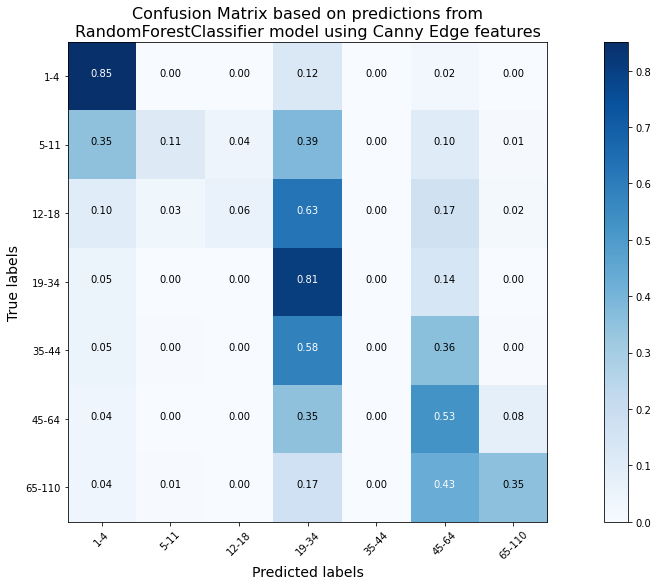

In [ ]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = df['age_range']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_rfc, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from\nRandomForestClassifier model using Canny Edge features",
                      export_as="rfc_canny_conf_mat_norm"
                     )

plt.show()

Normalized confusion matrix


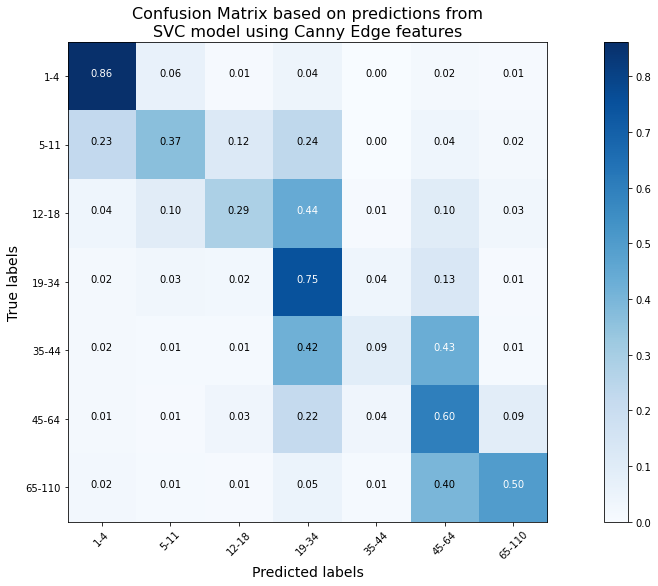

In [ ]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = df['age_range']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_svc, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from\nSVC model using Canny Edge features",
                      export_as="rfc_canny_conf_mat_norm"
                     )

plt.show()